# k-nearest neighbors regression model

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [33]:
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) 
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [34]:
data = pd.read_csv('Data/train.csv', index_col='id')
data_test = pd.read_csv('Data/test.csv', index_col='id')
data.head(5)

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1,85,f,2,t,-37.81554,144.96526,Apartment,Private room,4,0.5,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,3.68
2,151,f,18,f,-37.91984,145.03395,Apartment,Entire home/apt,6,2.0,...,95.0,10.0,9.0,10.0,10.0,10.0,10.0,t,moderate,0.82
3,188,f,1,t,-37.64818,145.54512,Guesthouse,Entire home/apt,6,1.0,...,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,5.50
4,200,f,1,t,-37.80245,144.98457,Apartment,Entire home/apt,4,2.5,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,flexible,0.26
5,90,t,2,f,-37.81796,144.96541,Apartment,Entire home/apt,2,1.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,8.06


In [35]:
data_test.head(5)

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1,f,1,f,-37.83753,144.99377,Apartment,Entire home/apt,2,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,NaN
2,f,3,t,-37.78394,145.13532,Townhouse,Entire home/apt,8,2.5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
3,f,1,f,-37.85689,144.96972,Apartment,Entire home/apt,4,1.0,1,...,95.0,10.0,10.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,2.32
4,f,1,t,-37.85946,144.97905,Apartment,Entire home/apt,2,1.0,1,...,98.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,0.14
5,t,5,t,-37.78225,145.15505,House,Entire home/apt,8,2.0,4,...,88.0,8.0,8.0,10.0,10.0,9.0,8.0,t,strict_14_with_grace_period,0.86


## 1. Exploratory Data Analysis 

In [36]:
data = data.drop([84, 2160, 2452, 3820, 3945, 4046, 4224, 5726, 5919, 6047])

In [37]:
d = data.groupby('property_type')['price'].describe().round(2)
d.sort_values(by=['mean'], inplace=True, ascending=False)
d

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Treehouse,1.0,800.00,NaN,800.0,800.00,800.0,800.00,800.0
Nature lodge,1.0,451.00,NaN,451.0,451.00,451.0,451.00,451.0
Boat,2.0,279.00,240.42,109.0,194.00,279.0,364.00,449.0
Other,15.0,243.67,403.85,26.0,58.00,129.0,212.50,1650.0
Farm stay,16.0,224.62,180.32,55.0,110.50,166.0,262.75,699.0
Villa,71.0,219.80,350.87,36.0,61.50,90.0,243.50,2380.0
Cottage,52.0,206.19,93.23,36.0,148.00,190.0,251.75,564.0
Serviced apartment,130.0,204.85,148.76,30.0,126.00,167.5,200.00,799.0
House,1688.0,168.94,253.35,14.0,50.00,90.0,200.00,4445.0


In [38]:
stats = data.describe().round(1)
stats[['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
      'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5073.0,5599.0,5642.0,5634.0,5638.0,5631.0,5636.0,5632.0,5630.0,5764.0
mean,312.5,67.7,94.1,9.6,9.4,9.7,9.7,9.7,9.5,1.6
std,489.5,60.4,8.4,0.8,1.0,0.7,0.7,0.6,0.9,1.7
min,0.0,0.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
25%,0.0,28.0,92.0,9.0,9.0,10.0,10.0,10.0,9.0,0.3
50%,200.0,60.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
75%,400.0,90.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.4
max,6958.0,668.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,13.8


In [39]:
data.min()

price                                       13
host_is_superhost                            f
host_total_listings_count                    0
host_identity_verified                       f
latitude                              -38.2244
longitude                              144.533
property_type                       Aparthotel
room_type                      Entire home/apt
accommodates                                 1
bathrooms                                    0
bedrooms                                     0
beds                                         0
security_deposit                             0
cleaning_fee                                 0
extra_people                                 0
minimum_nights                               1
maximum_nights                               1
number_of_reviews                            0
review_scores_rating                        20
review_scores_accuracy                       2
review_scores_cleanliness                    2
review_scores

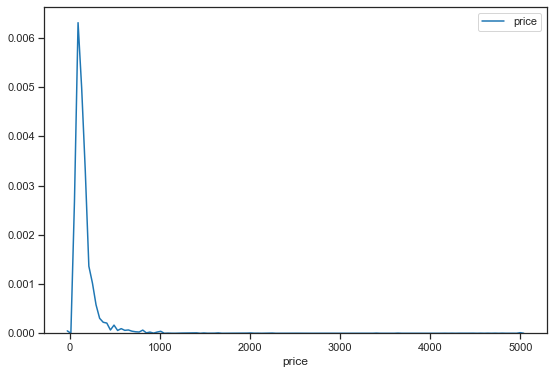

In [40]:
sns.distplot(data['price'], hist=False, label = 'price')

## 2. Data Preparation

In [41]:
data['superhost'] = (data['host_is_superhost'] =='t').astype(int)
data['verified'] = (data['host_identity_verified'] =='t').astype(int)
data['instant'] = (data['instant_bookable'] =='t').astype(int)
data['strict'] = (data['cancellation_policy'] =='super_strict_60').astype(int)

In [42]:
data_test['superhost'] = (data_test['host_is_superhost'] =='t').astype(int)
data_test['verified'] = (data_test['host_identity_verified'] =='t').astype(int)
data_test['instant'] = (data_test['instant_bookable'] =='t').astype(int)
data_test['strict'] = (data_test['cancellation_policy'] =='super_strict_60').astype(int)

In [43]:
data.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,superhost,verified,instant,strict
id,,,,,,,,,,,,,,,,,,,,,
1,85,f,2,t,-37.81554,144.96526,Apartment,Private room,4,0.5,...,10.0,10.0,10.0,f,strict_14_with_grace_period,3.68,0,1,0,0
2,151,f,18,f,-37.91984,145.03395,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,10.0,t,moderate,0.82,0,0,1,0
3,188,f,1,t,-37.64818,145.54512,Guesthouse,Entire home/apt,6,1.0,...,10.0,10.0,9.0,t,strict_14_with_grace_period,5.50,0,1,1,0
4,200,f,1,t,-37.80245,144.98457,Apartment,Entire home/apt,4,2.5,...,10.0,10.0,10.0,t,flexible,0.26,0,1,1,0
5,90,t,2,f,-37.81796,144.96541,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,t,strict_14_with_grace_period,8.06,1,0,1,0


### 2.1. Training and Test Sets

In [44]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, random_state=10)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()  # the copy here is for technical reasons

train.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,superhost,verified,instant,strict
id,,,,,,,,,,,,,,,,,,,,,
775,220,f,2,t,-37.80360,144.98436,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,8.0,f,flexible,0.03,0,1,0,0
6240,109,f,1,t,-37.87081,144.97754,Apartment,Entire home/apt,2,1.0,...,9.0,10.0,10.0,f,strict_14_with_grace_period,2.93,0,1,0,0
1919,165,t,3,f,-37.85187,145.36323,Bed and breakfast,Private room,2,1.0,...,10.0,10.0,10.0,f,strict_14_with_grace_period,0.56,1,0,0,0
545,54,t,4,t,-37.90865,145.12739,House,Private room,2,1.0,...,9.0,10.0,9.0,f,strict_14_with_grace_period,0.61,1,1,0,0
1949,129,t,12,f,-37.88155,144.98244,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,9.0,f,strict_14_with_grace_period,1.52,1,0,0,0


In [45]:
data = data.fillna(0)
train = train.fillna(0)
test = test.fillna(0)
data_test = data_test.fillna(0)
y_test = np.log(test['price'])
y_data = np.log(data['price'])

In [46]:
response = ['price']
predictors = ['superhost',
              'host_total_listings_count',
              'verified',
              'latitude',
              'longitude',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'security_deposit',
              'cleaning_fee',
              'extra_people',
              'minimum_nights',
              'maximum_nights',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_accuracy',
              'review_scores_cleanliness',
              'review_scores_checkin',
              'review_scores_communication',
              'review_scores_location',
              'review_scores_value',
              'instant',
              'strict',
              'reviews_per_month']

X_train = train[predictors]
X_test = test[predictors]
X_data = data[predictors]
y_train = train[response]
X_data_test = data_test[predictors]

### 2.2. EDA (correlation)  

In [47]:
corr = train.corr().round(3)[response]
corr.sort_values(by=['price'], inplace=True, ascending=False)
corr

,price
price,1.000
bedrooms,0.484
accommodates,0.468
security_deposit,0.439
bathrooms,0.436
cleaning_fee,0.431
beds,0.421
host_total_listings_count,0.164
extra_people,0.116
longitude,0.063


The highest correlation could be observed between the lodging price and bedrooms.

### 2.2. Data Transformation

In [48]:
y_train = np.log(train['price'])
y_test = np.log(test['price'])
y_data = np.log(data['price'])

## 3. k-NN regression model

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [50]:
model = KNeighborsRegressor() 
    
tuning_parameters = {
    'n_neighbors': np.arange(1,51),
}

knn_search = GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

### 3.1. Cross Validation

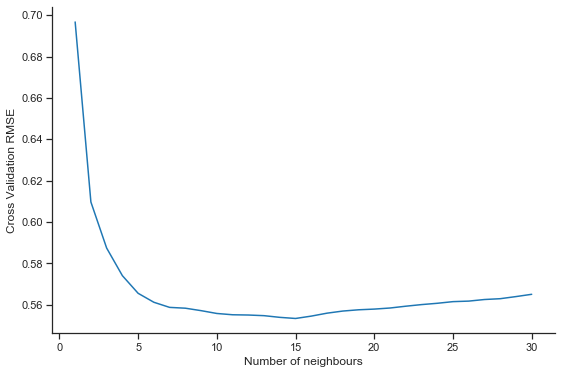

Lowest CV error: K = 15


In [56]:
from sklearn.model_selection import cross_val_score
neighbours=np.arange(1, 31)

cv_rmse = []
for k in neighbours: 
    model = KNeighborsRegressor(n_neighbors=k) 
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-1*np.mean(scores))
    cv_rmse.append(rmse)

fig, ax = plt.subplots()
ax.plot(neighbours, cv_rmse)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Cross Validation RMSE')
sns.despine()
plt.show()
  
print(f'Lowest CV error: K = {1 + np.argmin(cv_rmse)}')

In [57]:
knn_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [58]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=15) 

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
scores

array([-0.29570965, -0.29991926, -0.28796541, -0.29854321, -0.34923377])

In [59]:
np.sqrt(-1*np.mean(scores))

0.5534205101235617

In [60]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

### 3.2. Errors: RMSE and R-squared 

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

columns = ['RMSE', 'R-Squared']
rows = ['KNN']
results = pd.DataFrame(0.0, columns=columns, index=rows)

methods = [knn] 

for i, method in enumerate(methods):
    y_pred = method.predict(X_test)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
    results.iloc[i, 1] = r2_score(y_test, y_pred)

results.round(2)

,RMSE,R-Squared
KNN,0.56,0.32


## 4. Price Forecast

In [68]:
knn_model = KNeighborsRegressor(n_neighbors=14)
knn = knn_model.fit(X_data, y_data)

In [69]:
y_test = np.exp(knn.predict(X_data_test))

In [70]:
y_test = pd.DataFrame(data=y_test)

In [74]:
y_test.loc[555] = 0
y_test.loc[556] = 9999
y_test.loc[747] = 0
y_test.loc[1009] = 9999
y_test.loc[1287] = 9999
y_test.loc[1627] = 0
y_test.loc[1950] = 0
y_test.loc[1960] = 9999
y_test.loc[2113] = 9999
y_test.loc[2475] = 9999
y_test.loc[3563] = 9999
y_test.loc[4047] = 0
y_test.loc[4318] = 9999
y_test.loc[5357] = 9999
y_test.loc[5449] = 12624
y_test.loc[5925] = 0
y_test.loc[6105] = 0
y_test.loc[6227] = 9999
y_test.loc[6540] = 9999

In [75]:
y_test['Id'] = y_test.index + 1
y_test = y_test[['Id','Predicted']]

In [76]:
y_test.to_csv('Submissions/knn_submission.csv', index=False)